In [1]:
import os
os.chdir("/home/v-runmao/projects/R-Drop/vit_src/data")

In [35]:
from torchvision.transforms import Compose, RandomResizedCrop, Normalize, Resize
from torchvision.datasets import CIFAR100
from timm.data.auto_augment import rand_augment_transform, augment_and_mix_transform
import matplotlib.pyplot as plt
import numpy as np

from PIL import Image
from torch.utils.data import DataLoader

In [38]:
data = CIFAR100(root="./", train=True, download=False)

ra = rand_augment_transform(config_str="rand-m5-n2-mstd2", hparams={"translate_const": 250,
                                                                       "img_mean": (128, 128, 128)})
rrc = RandomResizedCrop((224, 224), scale=(0.05, 1.0))

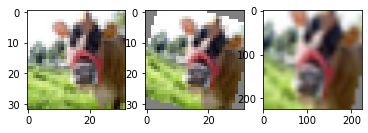

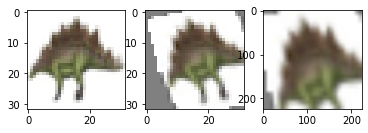

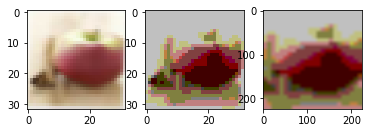

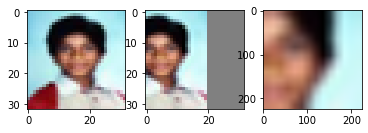

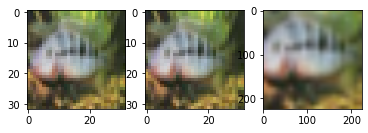

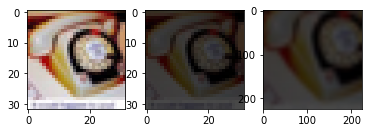

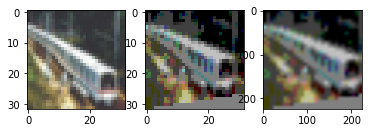

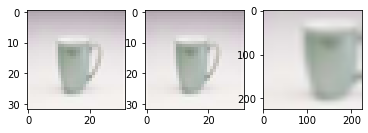

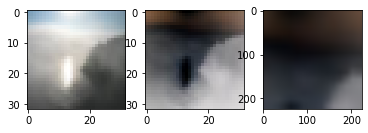

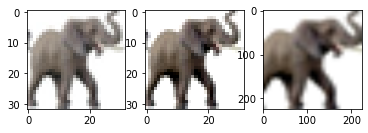

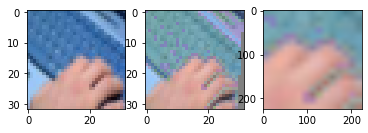

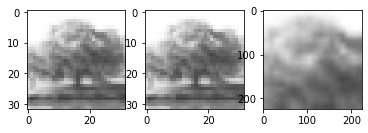

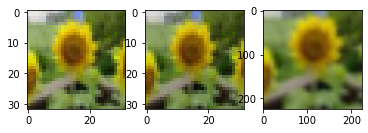

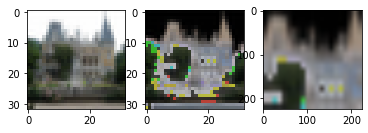

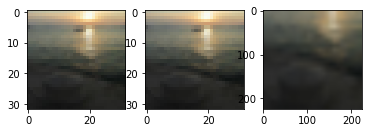

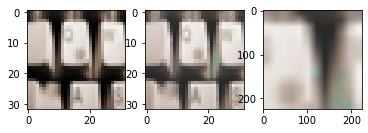

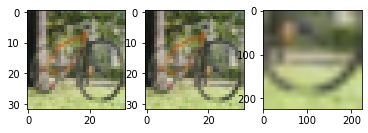

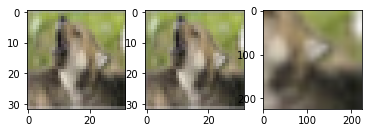

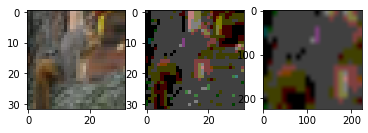

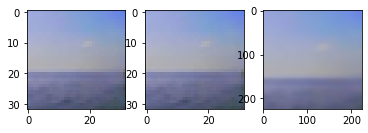

In [17]:
for i in range(20):
    x, y = data[i]
    x2 = ra(x)
    x3 = rrc(x2)
    fig, (ax1, ax2, ax3) = plt.subplots(1, 3)
    ax1.imshow(x)
    ax2.imshow(x2)
    ax3.imshow(x3)

# AugMix

In [37]:
am = augment_and_mix_transform(config_str="augmix-m3", hparams={})
resize = Resize((224, 224))
resize_before = Compose([resize, am])
resize_after = Compose([am, resize])

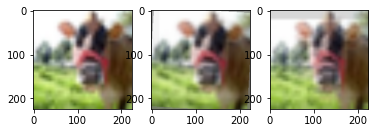

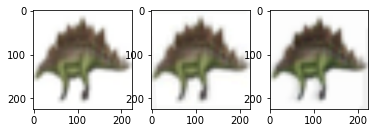

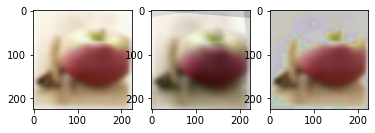

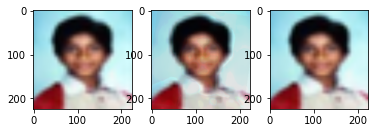

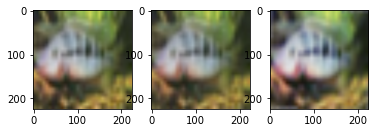

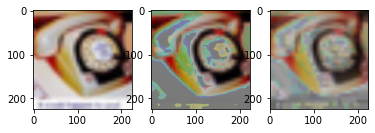

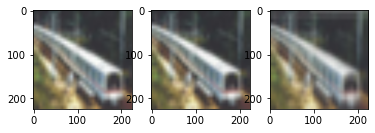

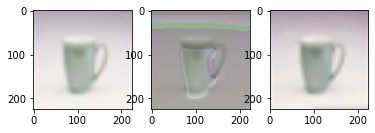

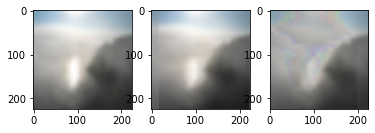

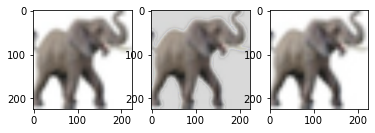

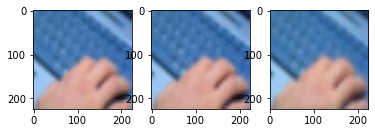

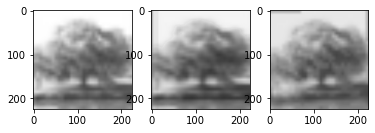

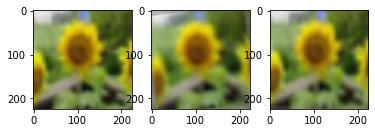

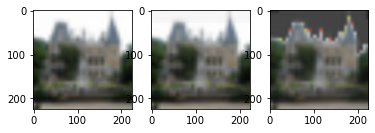

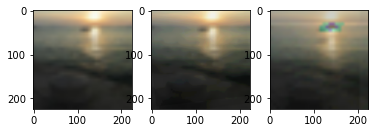

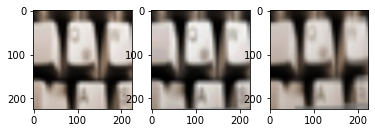

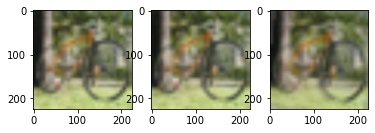

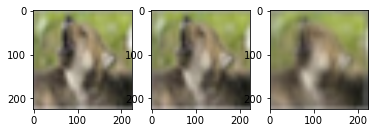

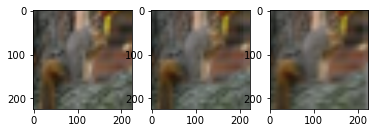

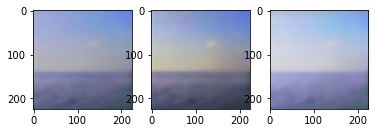

In [39]:
for i in range(20):
    x, y = data[i]
    x2 = resize_before(x)
    x3 = resize_after(x)
    fig, (ax1, ax2, ax3) = plt.subplots(1, 3)
    ax1.imshow(resize(x))
    ax2.imshow(x2)
    ax3.imshow(x3)